# TASK 4

EMAIL SPAM DETECTION WITH MACHINE LEARNING
    
- We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.
- In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!

Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sms_spam.csv', encoding='latin-1')
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [3]:
df['type_encoded'] = df['type'].map({'ham': 0, 'spam': 1})
df.head()

,type,text,type_encoded
0,ham,Hope you are having a good week. Just checking in,0
1,ham,K..give back my thanks.,0
2,ham,Am also doing in cbe only. But have to pay.,0
3,spam,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",1
4,spam,okmail: Dear Dave this is your final notice to...,1


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
encoder.fit_transform(df['type'])

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
df['type'] = encoder.fit_transform(df['type'])
df.head()

,type,text,type_encoded
0,0,Hope you are having a good week. Just checking in,0
1,0,K..give back my thanks.,0
2,0,Am also doing in cbe only. But have to pay.,0
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",1
4,1,okmail: Dear Dave this is your final notice to...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          5559 non-null   int32 
 1   text          5559 non-null   object
 2   type_encoded  5559 non-null   int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 108.7+ KB


In [8]:
df.describe()

,type,type_encoded
count,5559.000000,5559.000000
mean,0.134377,0.134377
std,0.341087,0.341087
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [9]:
df.shape

(5559, 3)

In [10]:
df.columns

Index(['type', 'text', 'type_encoded'], dtype='object')

In [11]:
df.isnull().sum()

type            0
text            0
type_encoded    0
dtype: int64

In [12]:
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(keep='first')

,type,text,type_encoded
0,0,Hope you are having a good week. Just checking in,0
1,0,K..give back my thanks.,0
2,0,Am also doing in cbe only. But have to pay.,0
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",1
4,1,okmail: Dear Dave this is your final notice to...,1
...,...,...,...
5554,0,You are a great role model. You are giving so ...,0
5555,0,"Awesome, I remember the last time we got someb...",0
5556,1,"If you don't, your prize will go to another cu...",1
5557,1,"SMS. ac JSco: Energy is high, but u may not kn...",1


In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5156, 3)

EDA

In [17]:
df['type'].value_counts()

0    4503
1     653
Name: type, dtype: int64

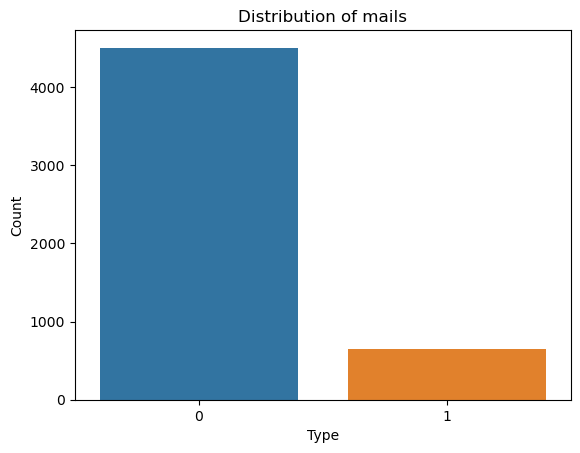

In [18]:
sns.countplot(data=df, x='type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of mails')
plt.show()

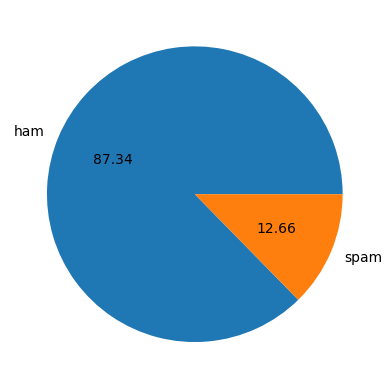

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels = ['ham','spam'], autopct= "%0.2f")
plt.show()

In [20]:
df.loc[df["type"] == "spam", "type"] = 0
df.loc[df["type"] == "ham", "type"] = 1

In [21]:
X = df["text"]
Y = df["type"]

In [22]:
print(X)

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
3       complimentary 4 STAR Ibiza Holiday or Â£10,000...
4       okmail: Dear Dave this is your final notice to...
                              ...                        
5554    You are a great role model. You are giving so ...
5555    Awesome, I remember the last time we got someb...
5556    If you don't, your prize will go to another cu...
5557    SMS. ac JSco: Energy is high, but u may not kn...
5558                      Shall call now dear having food
Name: text, Length: 5156, dtype: object


In [23]:
print(Y)

0       0
1       0
2       0
3       1
4       1
       ..
5554    0
5555    0
5556    1
5557    1
5558    0
Name: type, Length: 5156, dtype: int32


In [24]:
!pip install nltk

In [25]:
df['num_characters'] = df['text'].apply(len)

C:\Users\Mayuri Salankar\AppData\Local\Temp\ipykernel_12980\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [26]:
df.head()

,type,text,type_encoded,num_characters
0,0,Hope you are having a good week. Just checking in,0,49
1,0,K..give back my thanks.,0,23
2,0,Am also doing in cbe only. But have to pay.,0,43
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",1,150
4,1,okmail: Dear Dave this is your final notice to...,1,161


In [27]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Hope, you, are, having, a, good, week, ., Jus...
1                      [K, .., give, back, my, thanks, .]
2       [Am, also, doing, in, cbe, only, ., But, have,...
3       [complimentary, 4, STAR, Ibiza, Holiday, or, Â...
4       [okmail, :, Dear, Dave, this, is, your, final,...
                              ...                        
5554    [You, are, a, great, role, model, ., You, are,...
5555    [Awesome, ,, I, remember, the, last, time, we,...
5556    [If, you, do, n't, ,, your, prize, will, go, t...
5557    [SMS, ., ac, JSco, :, Energy, is, high, ,, but...
5558               [Shall, call, now, dear, having, food]
Name: text, Length: 5156, dtype: object

In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Mayuri Salankar\AppData\Local\Temp\ipykernel_12980\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
df.head()

,type,text,type_encoded,num_characters,num_words
0,0,Hope you are having a good week. Just checking in,0,49,11
1,0,K..give back my thanks.,0,23,7
2,0,Am also doing in cbe only. But have to pay.,0,43,12
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",1,150,23
4,1,okmail: Dear Dave this is your final notice to...,1,161,32


In [30]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Hope you are having a good week., Just checki...
1                               [K..give back my thanks.]
2          [Am also doing in cbe only., But have to pay.]
3       [complimentary 4 STAR Ibiza Holiday or Â£10,00...
4       [okmail: Dear Dave this is your final notice t...
                              ...                        
5554    [You are a great role model., You are giving s...
5555    [Awesome, I remember the last time we got some...
5556    [If you don't, your prize will go to another c...
5557    [SMS., ac JSco: Energy is high, but u may not ...
5558                    [Shall call now dear having food]
Name: text, Length: 5156, dtype: object

In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Mayuri Salankar\AppData\Local\Temp\ipykernel_12980\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [32]:
df.head()

,type,text,type_encoded,num_characters,num_words,num_sentences
0,0,Hope you are having a good week. Just checking in,0,49,11,2
1,0,K..give back my thanks.,0,23,7,1
2,0,Am also doing in cbe only. But have to pay.,0,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",1,150,23,3
4,1,okmail: Dear Dave this is your final notice to...,1,161,32,3


In [33]:
df['length']=df['text'].apply(len)

C:\Users\Mayuri Salankar\AppData\Local\Temp\ipykernel_12980\1886838198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length']=df['text'].apply(len)


In [34]:
df.head()

,type,text,type_encoded,num_characters,num_words,num_sentences,length
0,0,Hope you are having a good week. Just checking in,0,49,11,2,49
1,0,K..give back my thanks.,0,23,7,1,23
2,0,Am also doing in cbe only. But have to pay.,0,43,12,2,43
3,1,"complimentary 4 STAR Ibiza Holiday or Â£10,000...",1,150,23,3,150
4,1,okmail: Dear Dave this is your final notice to...,1,161,32,3,161


In [35]:
df[['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5156.000000,5156.000000,5156.000000
mean,78.768425,18.152250,1.954810
std,57.709698,12.739054,1.366388
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,60.000000,14.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,196.000000,28.000000


In [36]:
#for ham messages
df[df['type'] == 0][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4503.000000,4503.000000,4503.000000
mean,70.166556,16.764601,1.805685
std,55.671015,12.788323,1.280945
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,196.000000,28.000000


In [37]:
#for spam messages
df[df['type'] == 1][['num_characters', 'num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.085758,27.721286,2.983155
std,29.943331,6.988737,1.489645
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<Axes: ylabel='Frequency'>

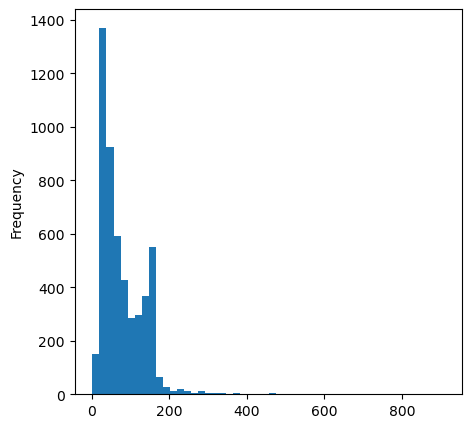

In [38]:
df['length'].plot(bins=50,kind='hist',figsize=(5,5))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

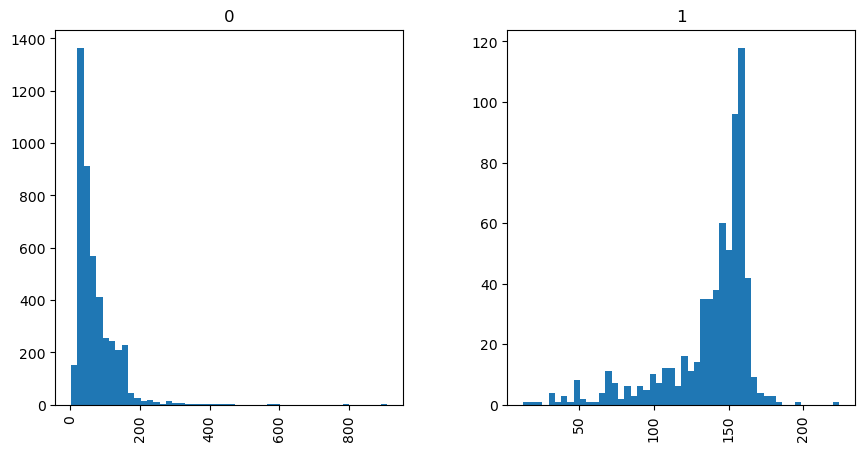

In [39]:
df.hist(column='length',by='type',bins=50,figsize=(10,5))

<Axes: xlabel='num_characters', ylabel='Count'>

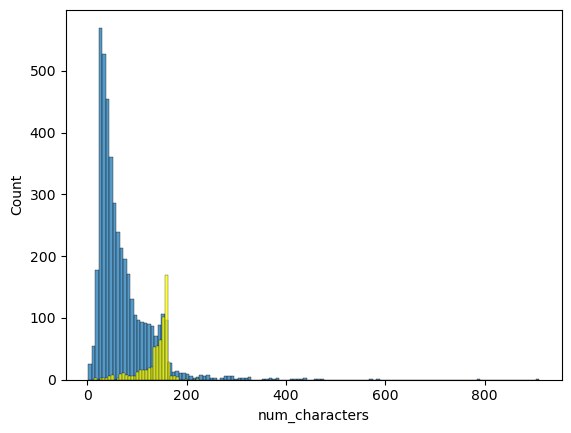

In [40]:
sns.histplot(df[df['type']==0]['num_characters'])
sns.histplot(df[df['type']==1]['num_characters'],color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

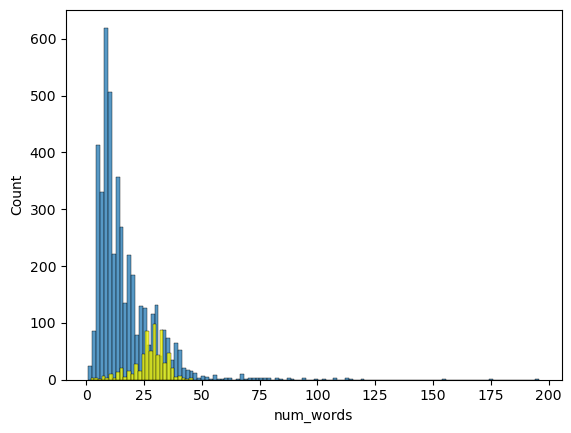

In [41]:
sns.histplot(df[df['type']==0]['num_words'])
sns.histplot(df[df['type']==1]['num_words'],color='yellow')

<Axes: xlabel='num_sentences', ylabel='Count'>

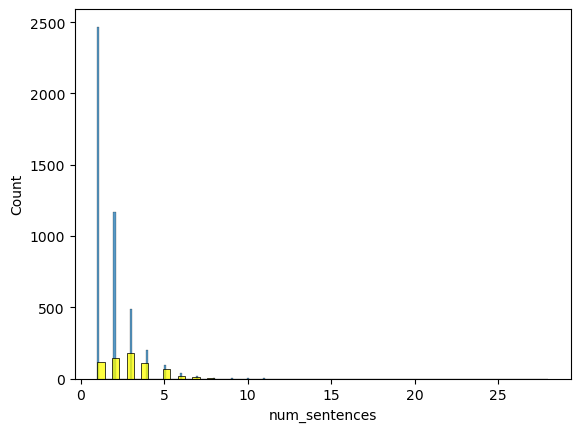

In [42]:
sns.histplot(df[df['type']==0]['num_sentences'])
sns.histplot(df[df['type']==1]['num_sentences'],color='yellow')

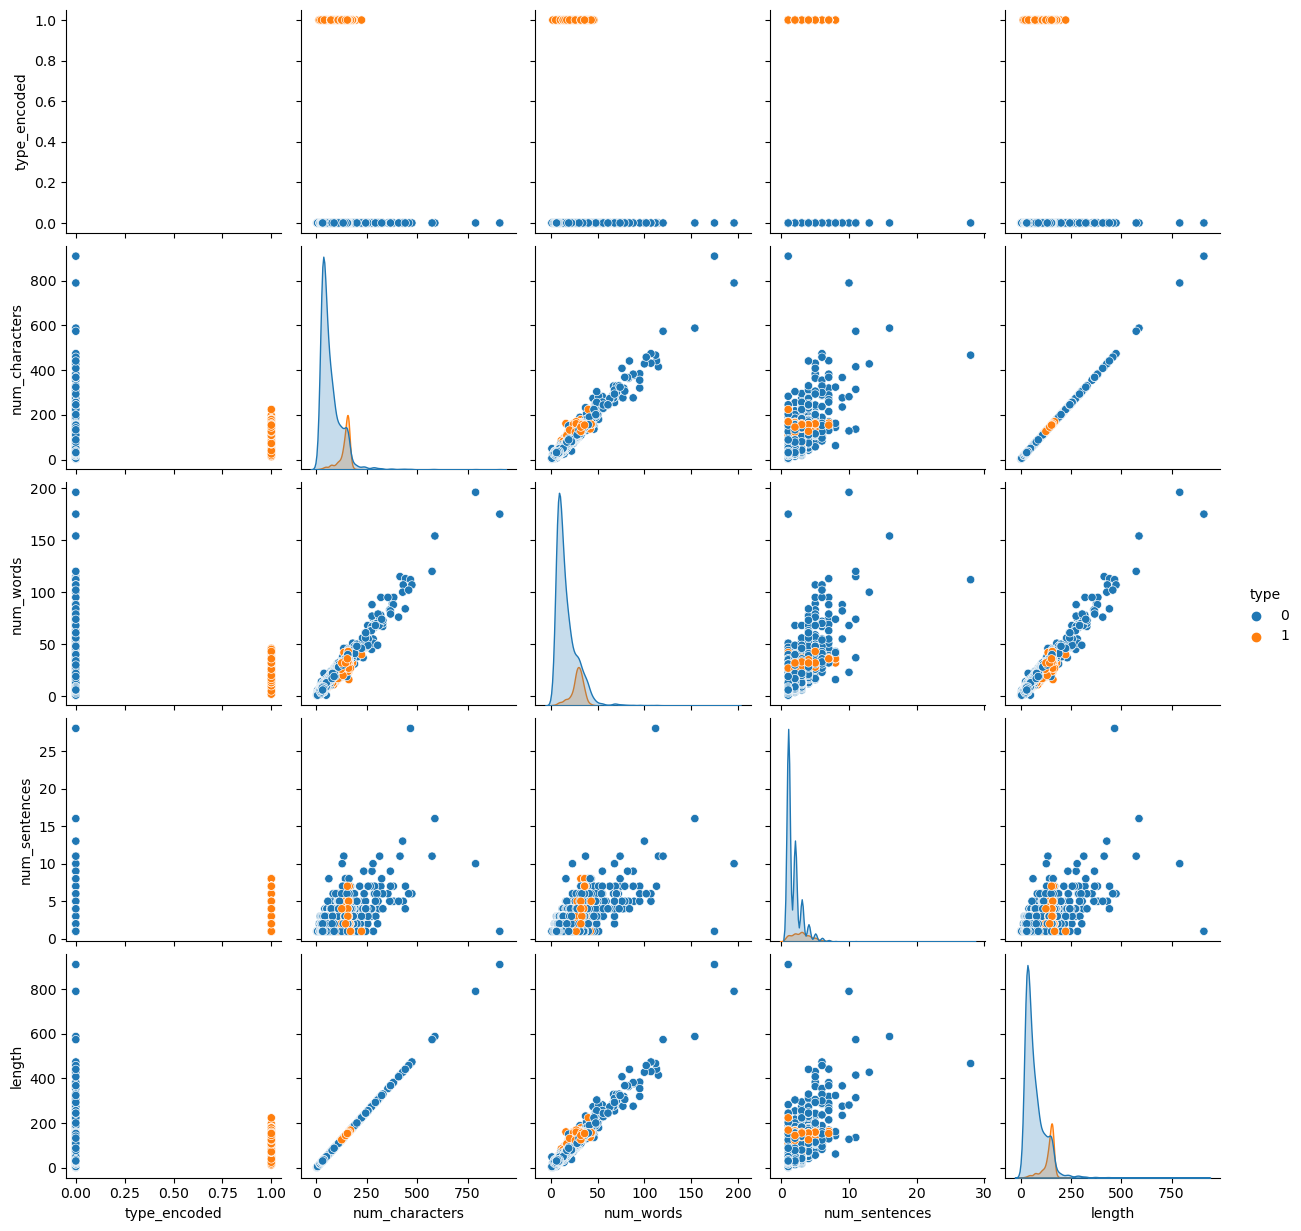

In [43]:
sns.pairplot(df,hue='type')

In [44]:
df.corr()

C:\Users\Mayuri Salankar\AppData\Local\Temp\ipykernel_12980\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,type,type_encoded,num_characters,num_words,num_sentences,length
type,1.000000,1.000000,0.391454,0.286074,0.286624,0.391454
type_encoded,1.000000,1.000000,0.391454,0.286074,0.286624,0.391454
num_characters,0.391454,0.391454,1.000000,0.971675,0.633260,1.000000
num_words,0.286074,0.286074,0.971675,1.000000,0.675484,0.971675
num_sentences,0.286624,0.286624,0.633260,0.675484,1.000000,0.633260
length,0.391454,0.391454,1.000000,0.971675,0.633260,1.000000


C:\Users\Mayuri Salankar\AppData\Local\Temp\ipykernel_12980\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

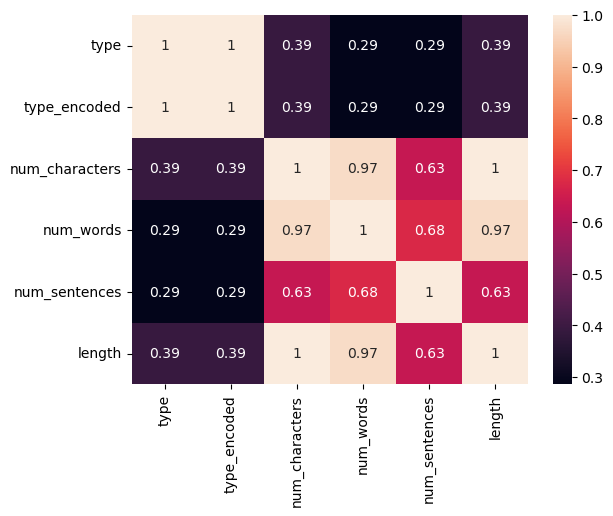

In [45]:
sns.heatmap(df.corr(),annot=True)

In [46]:
avg_word_count_df = round(sum([len(i.split()) for i in df['text']]) / len(df['text']))
avg_word_count_df

15

In [48]:
word_set_df = set()
for i in df.text:
    for j in i.split():
        word_set_df.add(j)

total_words_length_df = len(word_set_df)
print(total_words_length_df)

15521


In [49]:
from sklearn.model_selection import train_test_split

x_df = df['text']
y_df = df['type_encoded']

x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(x_df, y_df, test_size=0.2)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec_df = TfidfVectorizer().fit(x_train_df)
x_train_vec_df, x_test_vec_df = tfidf_vec_df.transform(x_train_df), tfidf_vec_df.transform(x_test_df)

In [51]:
from sklearn.naive_bayes import MultinomialNB

baseline_model_df = MultinomialNB()
baseline_model_df.fit(x_train_vec_df, y_train_df)

MultinomialNB()

In [52]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_df = baseline_model_df.predict(x_test_vec_df)

nb_accuracy_df = accuracy_score(y_test_df, y_pred_df)
print(nb_accuracy_df)
print(classification_report(y_test_df, y_pred_df))

0.9602713178294574
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       899
           1       1.00      0.69      0.82       133

    accuracy                           0.96      1032
   macro avg       0.98      0.85      0.90      1032
weighted avg       0.96      0.96      0.96      1032



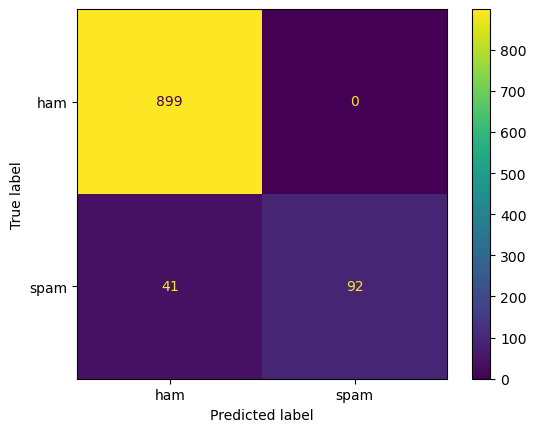

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig_df = ConfusionMatrixDisplay(confusion_matrix(y_test_df, y_pred_df), display_labels=['ham', 'spam'])
fig_df.plot()